# 1 A Convolutional Autoencoder

The components of this network will be Conv2D, MaxPooling, and so on.
The encoder part of the network should run the input image through a few
convolutional layers of your choice. The decoder part of the network will utilize
UpSampling2D to get the representation back to the original image size.

In [16]:
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import backend, optimizers
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import backend as K

Model training.

In [9]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
inputs = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (2, 2), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = BatchNormalization()(x)
x = Conv2D(16, (2, 2), activation='relu', padding='same')(x)
x = Conv2D(4, (2, 2), activation='relu', padding='same')(x)
x = Conv2D(1, (2, 2), activation='relu', padding='same')(x)
x = Flatten()(x)
encoded = Dense(2, activation='relu')(x)

encoder = Model(inputs=inputs, outputs=encoded)

encoded_inputs = Input(shape=(2,))

x = Dense(4, activation='relu')(encoded_inputs)
x = Reshape((2, 2, 1))(x)
x = Conv2D(4, (2, 2), activation='relu', padding='same')(x)
x = Conv2D(16, (2, 2), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((7, 7))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

decoder = Model(inputs=encoded_inputs, outputs=decoded)

x = encoder(inputs)
x = decoder(x)
autoencoder = Model(inputs=inputs, outputs=x)
autoencoder.compile(optimizer=optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy', 'mse'])

I'm discarding the labels (since we're only interested in encoding/decoding the input images).

In [15]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [17]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 667s 11ms/sample - loss: 0.3986 - accuracy: 0.4929 - mse: 0.0517 - val_loss: 1.1067 - val_accuracy: 0.4999 - val_mse: 0.1873
Epoch 2/50
60000/60000 [==============================] - 654s 11ms/sample - loss: 0.3656 - accuracy: 0.4962 - mse: 0.0407 - val_loss: 0.5314 - val_accuracy: 0.4987 - val_mse: 0.0866
Epoch 3/50
60000/60000 [==============================] - 567s 9ms/sample - loss: 0.3587 - accuracy: 0.4969 - mse: 0.0387 - val_loss: 0.3699 - val_accuracy: 0.4918 - val_mse: 0.0422
Epoch 4/50
60000/60000 [==============================] - 437s 7ms/sample - loss: 0.3545 - accuracy: 0.4973 - mse: 0.0374 - val_loss: 0.3726 - val_accuracy: 0.4829 - val_mse: 0.0439
Epoch 5/50
60000/60000 [==============================] - 543s 9ms/sample - loss: 0.3513 - accuracy: 0.4978 - mse: 0.0364 - val_loss: 0.3533 - val_accuracy: 0.4952 - val_mse: 0.0364
Epoch 6/50
60000/60000 [==============

60000/60000 [==============================] - 438s 7ms/sample - loss: 0.3342 - accuracy: 0.5006 - mse: 0.0311 - val_loss: 0.3372 - val_accuracy: 0.4997 - val_mse: 0.0315
Epoch 46/50
60000/60000 [==============================] - 425s 7ms/sample - loss: 0.3340 - accuracy: 0.5007 - mse: 0.0310 - val_loss: 0.3387 - val_accuracy: 0.4965 - val_mse: 0.0322
Epoch 47/50
60000/60000 [==============================] - 425s 7ms/sample - loss: 0.3347 - accuracy: 0.5005 - mse: 0.0312 - val_loss: 0.3384 - val_accuracy: 0.4989 - val_mse: 0.0318
Epoch 48/50
60000/60000 [==============================] - 423s 7ms/sample - loss: 0.3344 - accuracy: 0.5006 - mse: 0.0312 - val_loss: 0.3383 - val_accuracy: 0.4991 - val_mse: 0.0319
Epoch 49/50
60000/60000 [==============================] - 425s 7ms/sample - loss: 0.3354 - accuracy: 0.5007 - mse: 0.0312 - val_loss: 0.3417 - val_accuracy: 0.4972 - val_mse: 0.0328
Epoch 50/50
60000/60000 [==============================] - 425s 7ms/sample - loss: 0.3336 - accur

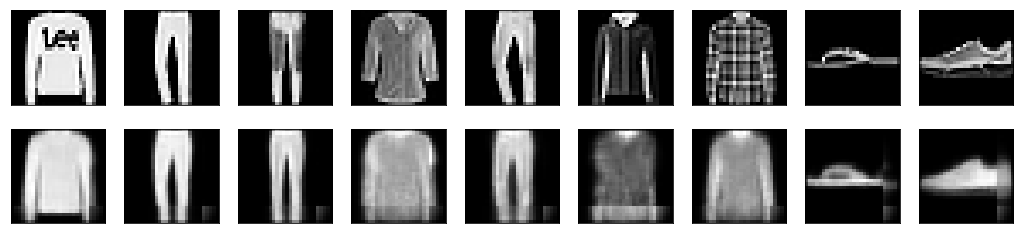

In [18]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 2 Image Classification

## 2.1 Deep CNN

In [17]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.optimizers import SGD

In [20]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [21]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [22]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [23]:
x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))

x_test = x_test.astype('float32') / 255. 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

+ Kernel sizes: 3 $\times$ 3 and 2 $\times$ 2
+ Strides: 2 $\times$ 2
+ Padding: case-insensitively same
+ Network depth: 8

In [24]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Flatten()(encoded)
x = Dense(100, activation='relu')(x)
decoded = Dense(10, activation='softmax')(x)

opt = SGD(lr=0.01, momentum=0.9)

deep_cnn = Model(input_img, decoded)
deep_cnn.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
deep_cnn.fit(x_train, y_train,
                epochs=50,
                batch_size=500,
                shuffle=True,
                validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 28s 474us/sample - loss: 1.2082 - accuracy: 0.5561 - val_loss: 0.7487 - val_accuracy: 0.7265
Epoch 2/50
60000/60000 [==============================] - 31s 524us/sample - loss: 0.6322 - accuracy: 0.7715 - val_loss: 0.6019 - val_accuracy: 0.7805
Epoch 3/50
60000/60000 [==============================] - 29s 484us/sample - loss: 0.5423 - accuracy: 0.8022 - val_loss: 0.5262 - val_accuracy: 0.8110
Epoch 4/50
60000/60000 [==============================] - 28s 469us/sample - loss: 0.4979 - accuracy: 0.8180 - val_loss: 0.4978 - val_accuracy: 0.8221
Epoch 5/50
60000/60000 [==============================] - 27s 449us/sample - loss: 0.4661 - accuracy: 0.8308 - val_loss: 0.4771 - val_accuracy: 0.8240
Epoch 6/50
60000/60000 [==============================] - 26s 437us/sample - loss: 0.4460 - accuracy: 0.8378 - val_loss: 0.4594 - val_accuracy: 0.8370
Epoch 7/50
60000/60000 [====================

In [27]:
_, acc = deep_cnn.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 89.030


## 2.2 Transfer Learning

## VGG

In [18]:
from tensorflow.keras.layers import Activation, BatchNormalization, LeakyReLU

In [30]:
model_vgg=Sequential()
model_vgg.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", 
          input_shape=x_train.shape[1:], activation='relu'))
model_vgg.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation='relu'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2)))
model_vgg.add(Dropout(0.5))
model_vgg.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation='relu'))
model_vgg.add(Conv2D(filters=256, kernel_size=(3, 3), padding="valid", activation='relu'))
model_vgg.add(MaxPooling2D(pool_size=(3, 3)))
model_vgg.add(Dropout(0.5))
model_vgg.add(Flatten())
model_vgg.add(Dense(256))
model_vgg.add(LeakyReLU())
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(256))
model_vgg.add(LeakyReLU())
model_vgg.add(Dense(10, activation='softmax'))
model_vgg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model_vgg.summary()

In [31]:
model_vgg_fit=model_vgg.fit(x_train, y_train, 
                      validation_data = (x_test, y_test), 
                      epochs=50, verbose=1, batch_size=256)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 682s 11ms/sample - loss: 0.6421 - accuracy: 0.7634 - val_loss: 0.3617 - val_accuracy: 0.8647
Epoch 2/50
60000/60000 [==============================] - 594s 10ms/sample - loss: 0.3703 - accuracy: 0.8636 - val_loss: 0.2917 - val_accuracy: 0.8932
Epoch 3/50
60000/60000 [==============================] - 654s 11ms/sample - loss: 0.3138 - accuracy: 0.8850 - val_loss: 0.2660 - val_accuracy: 0.9006
Epoch 4/50
60000/60000 [==============================] - 718s 12ms/sample - loss: 0.2824 - accuracy: 0.8964 - val_loss: 0.2488 - val_accuracy: 0.9088
Epoch 5/50
60000/60000 [==============================] - 629s 10ms/sample - loss: 0.2602 - accuracy: 0.9040 - val_loss: 0.2346 - val_accuracy: 0.9159
Epoch 6/50
60000/60000 [==============================] - 673s 11ms/sample - loss: 0.2434 - accuracy: 0.9112 - val_loss: 0.2424 - val_accuracy: 0.9107
Epoch 7/50
60000/60000 [====================

In [32]:
_, acc = model_vgg.evaluate(x_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 93.660


# Text Classification

## 3.1 RNN

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
tweets = pd.read_csv("~/Downloads/tweets_with_labels.csv", sep='\t')

In [6]:
tweets.head()

,id,tweet,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,1,Jazz for a Rainy Afternoon: {link},0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
1,2,RT: @mention: I love rainy days.,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
2,3,Good Morning Chicago! Time to kick the Windy C...,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0
3,6,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.0,0.0,0.0,0.0,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.0
4,9,@mention good morning sunshine,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.0


In [15]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

In [37]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(tweets['tweet'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 43805 unique tokens.


In [38]:
X = tokenizer.texts_to_sequences(tweets['tweet'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (77946, 250)


In [39]:
y = pd.get_dummies(tweets[tweets.columns[-15:]]).values
print('Shape of label tensor:', y.shape)

Shape of label tensor: (77946, 15)


In [61]:
model_lstm = Sequential()
model_lstm.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model_lstm.add(SpatialDropout1D(0.2))
model_lstm.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(15, activation='softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(70151, 250) (70151, 15)
(7795, 250) (7795, 15)


In [63]:
epochs = 5
batch_size = 64

model_lstm.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
          validation_split=0.1) # training:test = 9:1

Train on 63135 samples, validate on 7016 samples
Epoch 1/5
63135/63135 [==============================] - 780s 12ms/sample - loss: 1.9268 - accuracy: 0.6050 - val_loss: 1.4078 - val_accuracy: 0.7772
Epoch 2/5
63135/63135 [==============================] - 981s 16ms/sample - loss: 1.4145 - accuracy: 0.7862 - val_loss: 1.4045 - val_accuracy: 0.7915
Epoch 3/5
63135/63135 [==============================] - 755s 12ms/sample - loss: 1.4201 - accuracy: 0.7981 - val_loss: 1.4819 - val_accuracy: 0.8023
Epoch 4/5
63135/63135 [==============================] - 836s 13ms/sample - loss: 1.4592 - accuracy: 0.8068 - val_loss: 1.6059 - val_accuracy: 0.8059
Epoch 5/5
63135/63135 [==============================] - 705s 11ms/sample - loss: 1.5391 - accuracy: 0.8102 - val_loss: 1.7527 - val_accuracy: 0.7975


In [64]:
_, acc = model_lstm.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 79.282


## 3.2 1D CNN

In [21]:
from tensorflow.keras.layers import Conv1D, Convolution1D, GlobalMaxPooling1D, MaxPooling1D, Activation
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing import sequence

In [22]:
docs = []
sentences = []

for sentences in tweets.tweet:
    sentences_cleaned = [sent.lower() for sent in sentences]
    docs.append(sentences_cleaned)

In [25]:
txt = ''
for doc in docs:
    for s in doc:
        txt += s
chars = set(txt)
vocab_size = len(chars)
print('total chars:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

total chars: 68


There are a total of 68 characters in the tweets.

In [41]:
maxlen = 1000 
nb_filter = 8
dense_outputs = 1000
filter_kernels = [64, 64, 32, 32, 8, 8]

In [42]:
def vectorize_sentences(data, char_indices):
    X = []
    for sentences in data:
        x = [char_indices[w] for w in sentences]
        X.append(x)
        #print(x)
    return (pad_sequences(X, maxlen=maxlen))

In [49]:
char_all = vectorize_sentences(docs, char_indices)
char_all.shape

(77946, 1000)

In [50]:
label_all = pd.get_dummies(tweets[tweets.columns[-15:]]).values
label_all.shape

(77946, 15)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(char_all, label_all, test_size = 0.10, random_state = 123)

In [59]:
max_features = 5000
maxlen = 1000
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250

In [60]:
model_1dcnn = Sequential()
model_1dcnn.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model_1dcnn.add(Dropout(0.2))
model_1dcnn.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model_1dcnn.add(GlobalMaxPooling1D())
model_1dcnn.add(Dense(hidden_dims))
model_1dcnn.add(Dropout(0.2))
model_1dcnn.add(Activation('relu'))
model_1dcnn.add(Dense(15))
model_1dcnn.add(Activation('sigmoid'))
model_1dcnn.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [61]:
model_1dcnn.fit(X_train, y_train, batch_size=32, epochs=5, validation_split = 0.1)

Train on 63135 samples, validate on 7016 samples
Epoch 1/5
63135/63135 [==============================] - 459s 7ms/sample - loss: 1.5170 - accuracy: 0.7214 - val_loss: 1.2000 - val_accuracy: 0.8000
Epoch 2/5
63135/63135 [==============================] - 441s 7ms/sample - loss: 1.2105 - accuracy: 0.8029 - val_loss: 1.1375 - val_accuracy: 0.8082
Epoch 3/5
63135/63135 [==============================] - 432s 7ms/sample - loss: 1.1648 - accuracy: 0.8100 - val_loss: 1.1070 - val_accuracy: 0.8216
Epoch 4/5
63135/63135 [==============================] - 469s 7ms/sample - loss: 1.1513 - accuracy: 0.8139 - val_loss: 1.0985 - val_accuracy: 0.8123
Epoch 5/5
63135/63135 [==============================] - 586s 9ms/sample - loss: 1.1487 - accuracy: 0.8135 - val_loss: 1.0971 - val_accuracy: 0.8168


In [62]:
_, acc = model_1dcnn.evaluate(X_test, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 81.450


## 3.3 Comparison

The accuracy of the is 79.282 RNN model while the accuracy of the CNN model is 81.450. Hence, in terms of accuracy, the performance of CNN model is better.